**Problem Set 2**

---


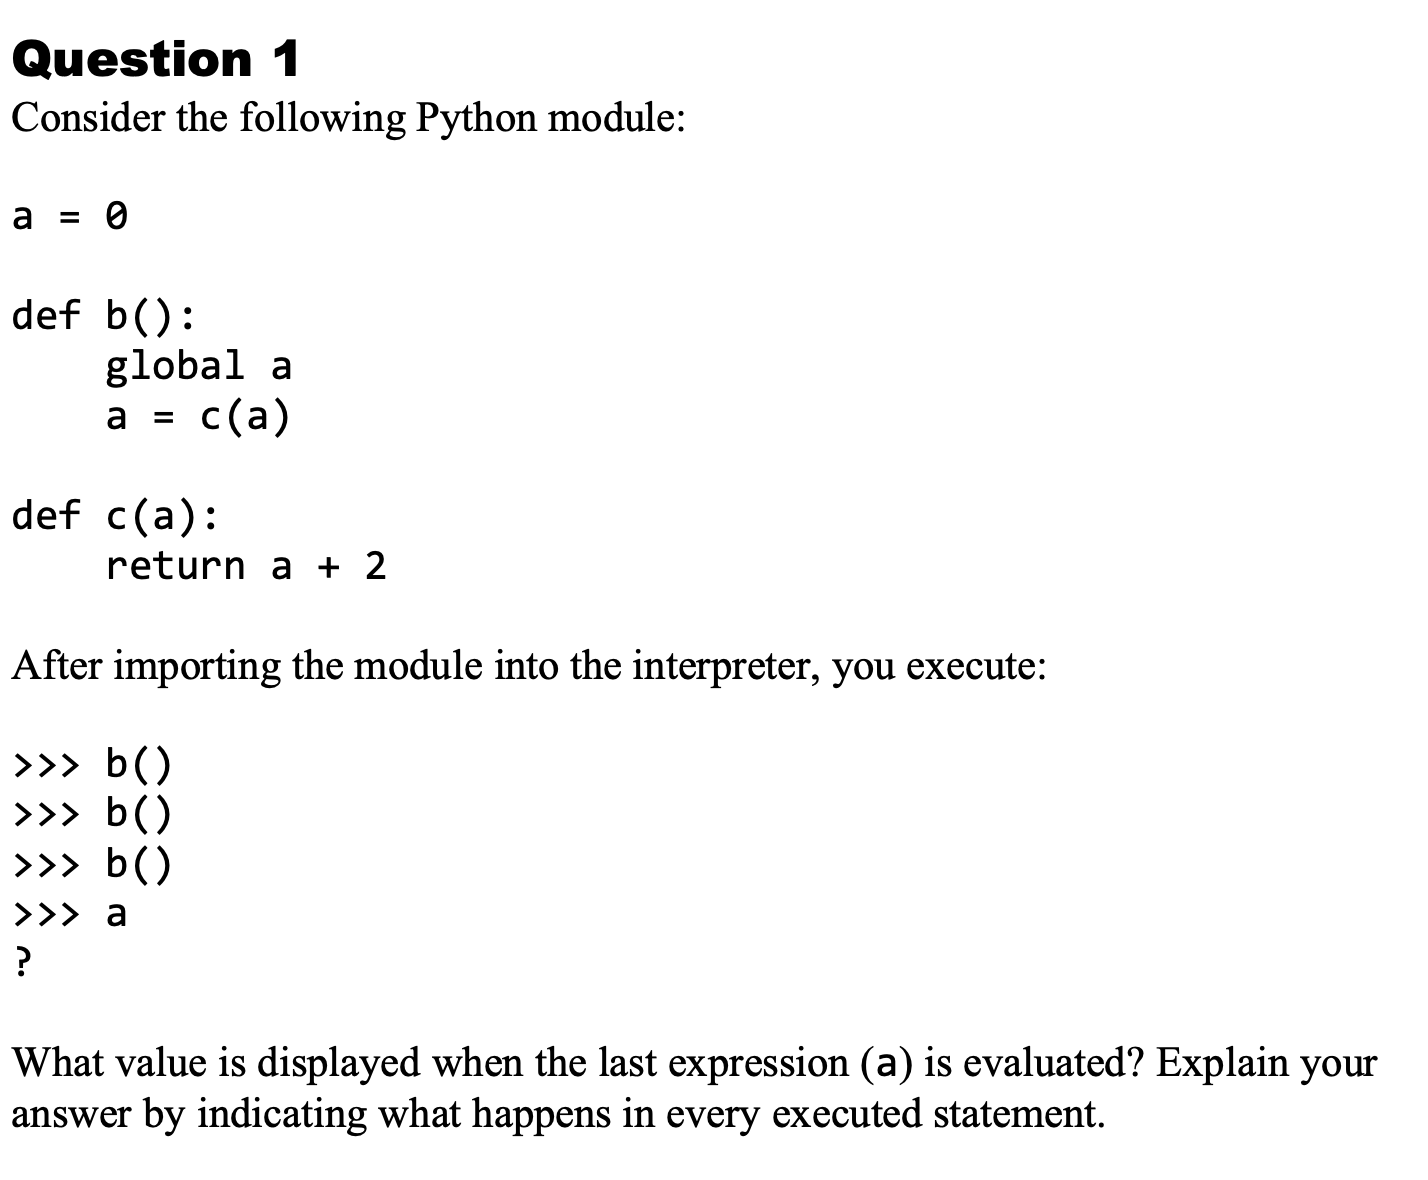

**The value displayed when val is evaluated will be 6. <br>Here's the explanation:<br>**

Initially, a is set to 0.<br>
When b() is called the first time, a is updated to the result of c(a), which is 0 + 2 = 2.<br>
When b() is called the second time, a is updated to 2 + 2 = 4.<br>
When b() is called the third time, a is updated to 4 + 2 = 6.<br>


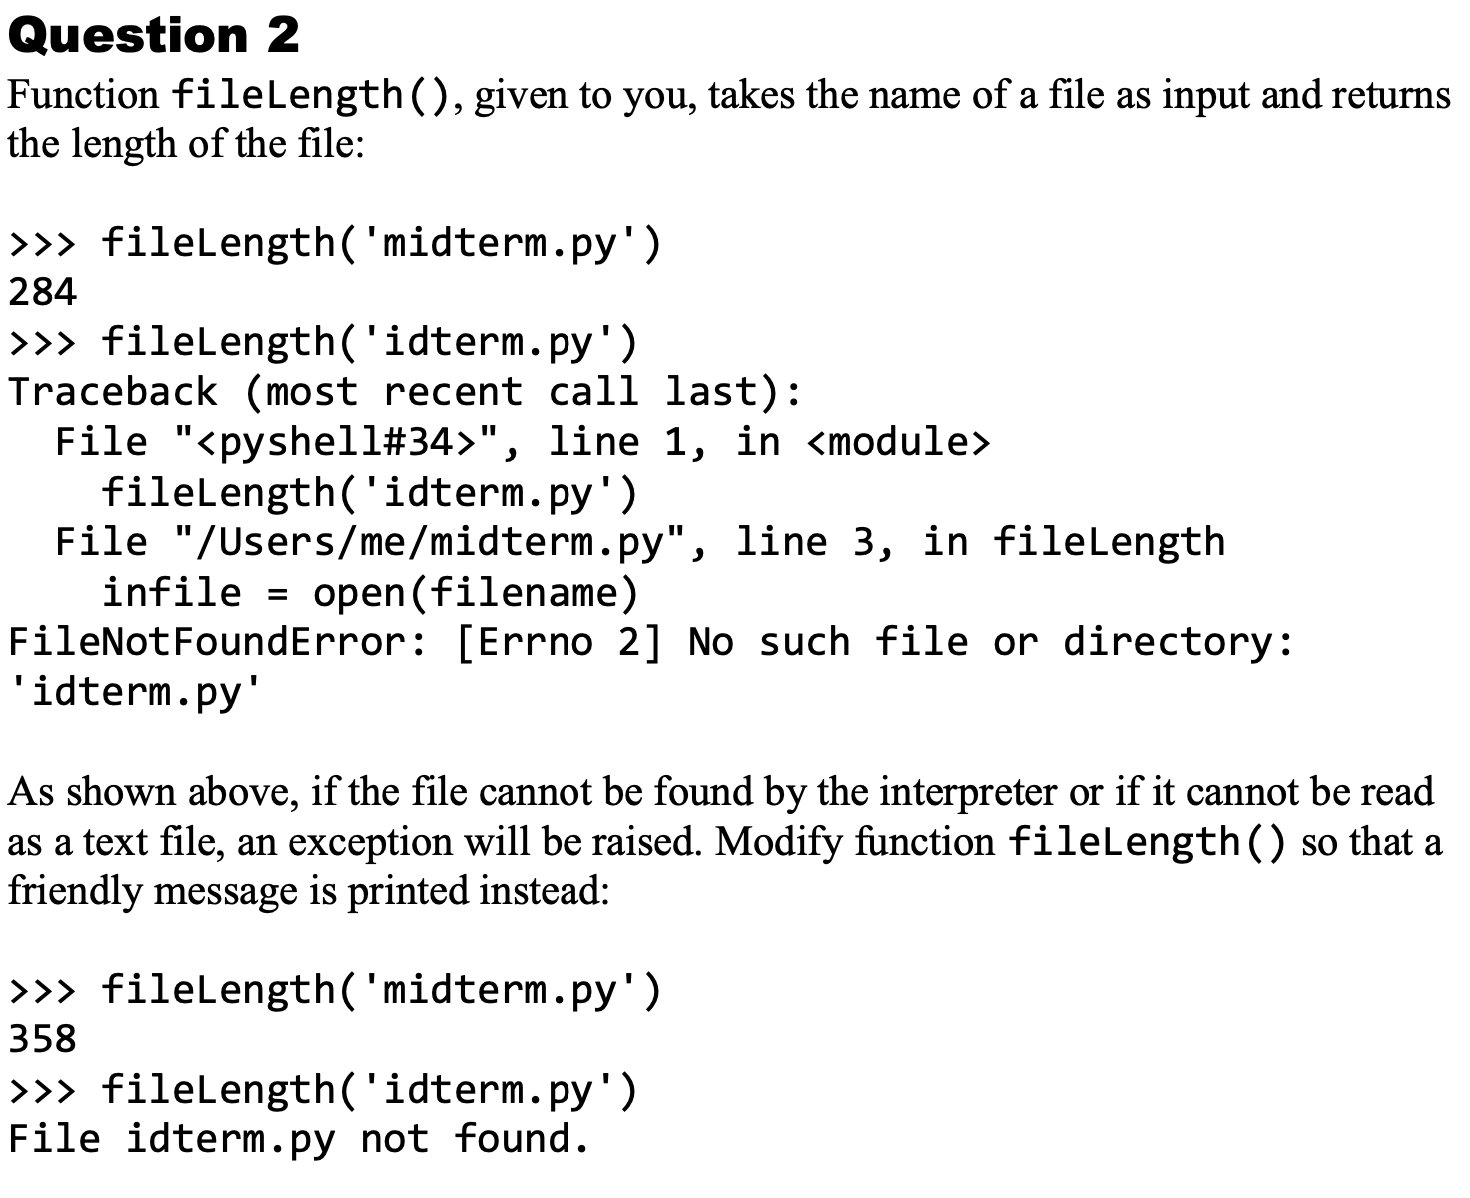

We need to modify the fileLength function as follows:<br>

In [13]:
def fileLength(filename):
    try:
        infile = open(filename)
        contents = infile.read()
        infile.close()
        return len(contents)
    except FileNotFoundError:
        return f"File {filename} not found."

# Test cases
print(fileLength('midterm.py'))
print(fileLength('idterm.py'))


123
File idterm.py not found.


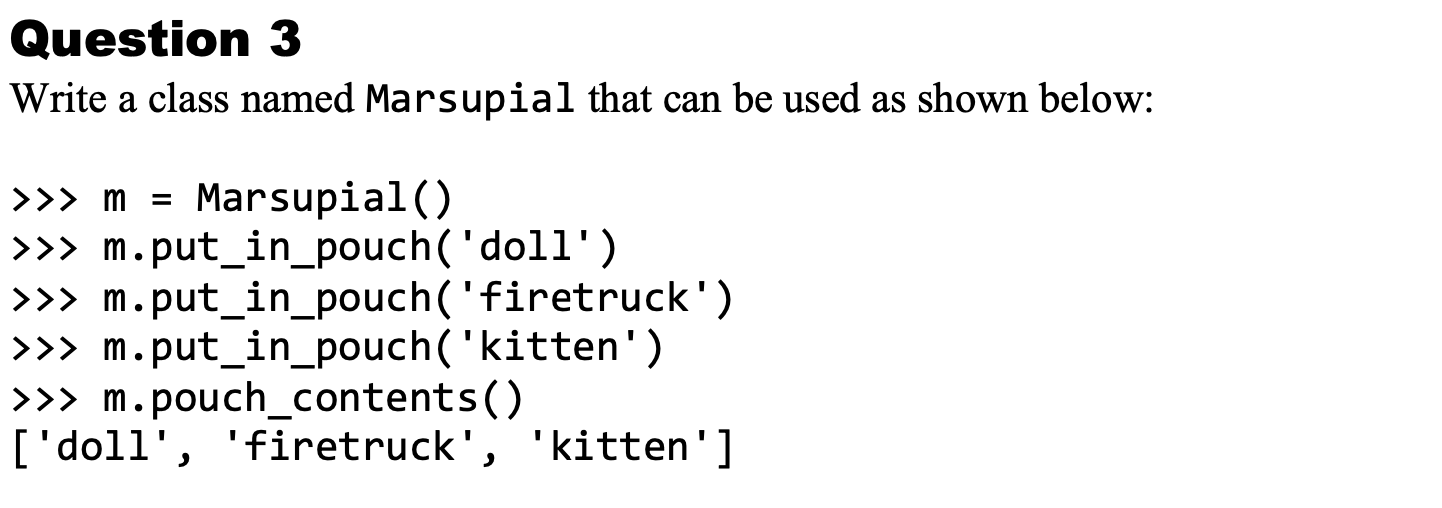

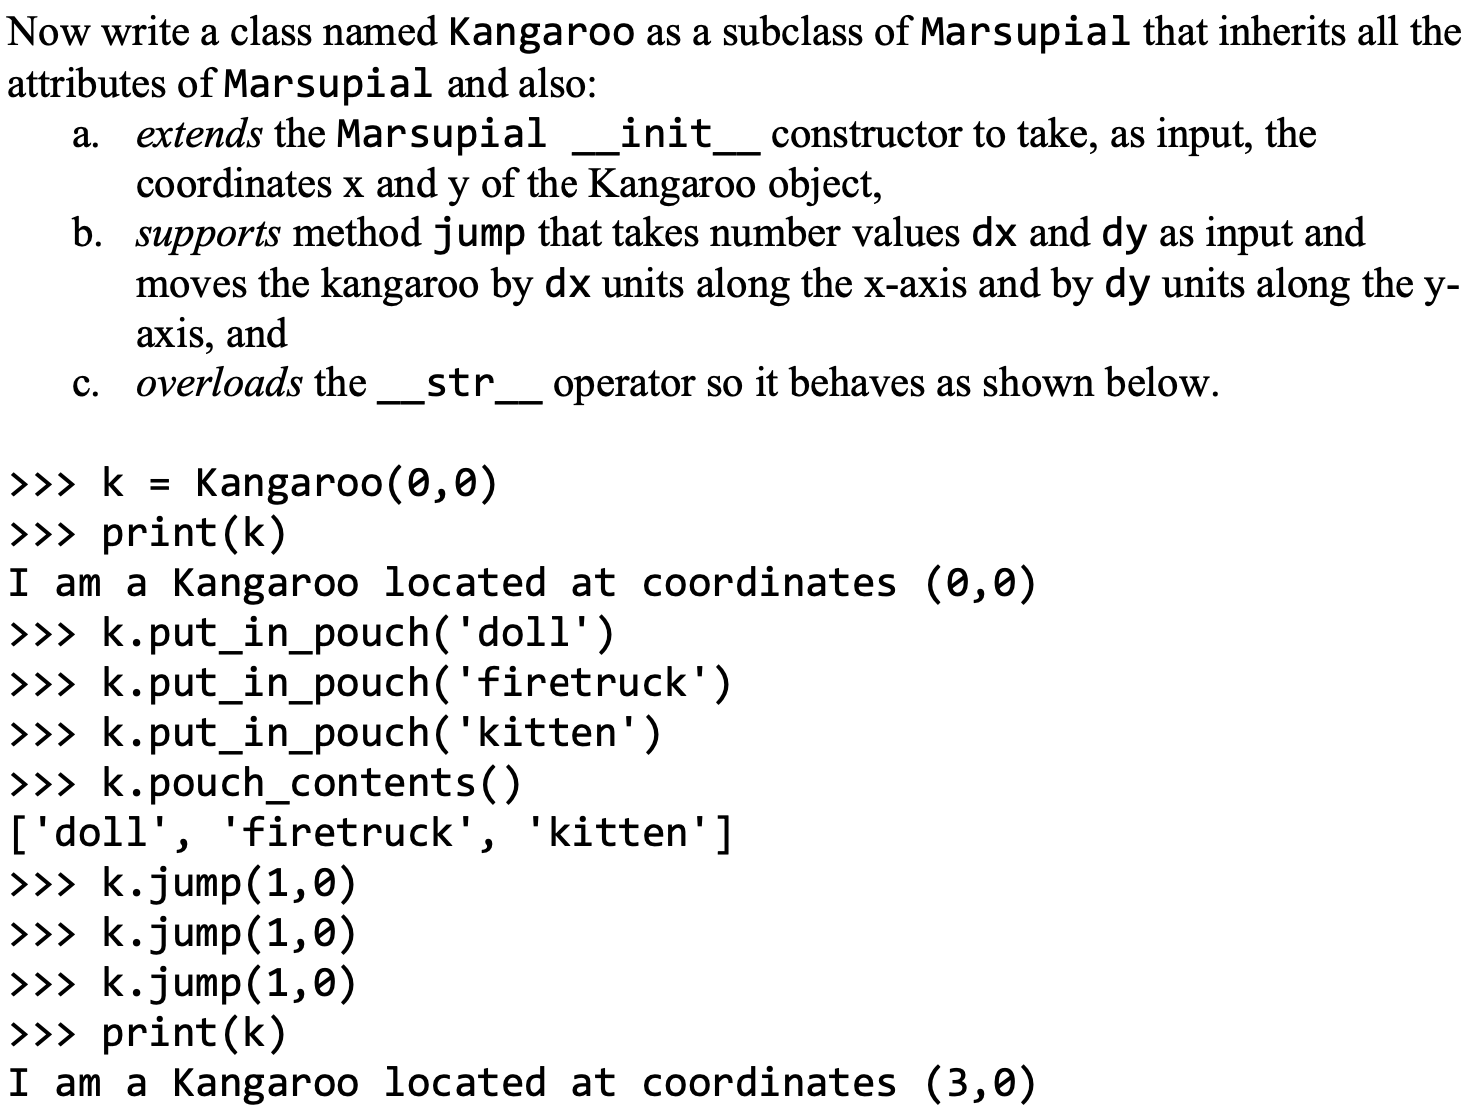

In [2]:
class Marsupial:
    def __init__(self):
        self.pouch = []

    def put_in_pouch(self, item):
        self.pouch.append(item)

    def pouch_contents(self):
        return self.pouch

class Kangaroo(Marsupial):
    def __init__(self, x, y):
        super().__init__()
        self.x = x
        self.y = y

    def jump(self, dx, dy):
        self.x += dx
        self.y += dy

    def __str__(self):
        return f"I am a Kangaroo located at coordinates ({self.x},{self.y})"

# Test cases
k = Kangaroo(0, 0)
print(k)
k.put_in_pouch('doll')
k.put_in_pouch('firetruck')
k.put_in_pouch('kitten')
print(k.pouch_contents())
k.jump(1, 0)
k.jump(1, 0)
k.jump(1, 0)
print(k)


I am a Kangaroo located at coordinates (0,0)
['doll', 'firetruck', 'kitten']
I am a Kangaroo located at coordinates (3,0)


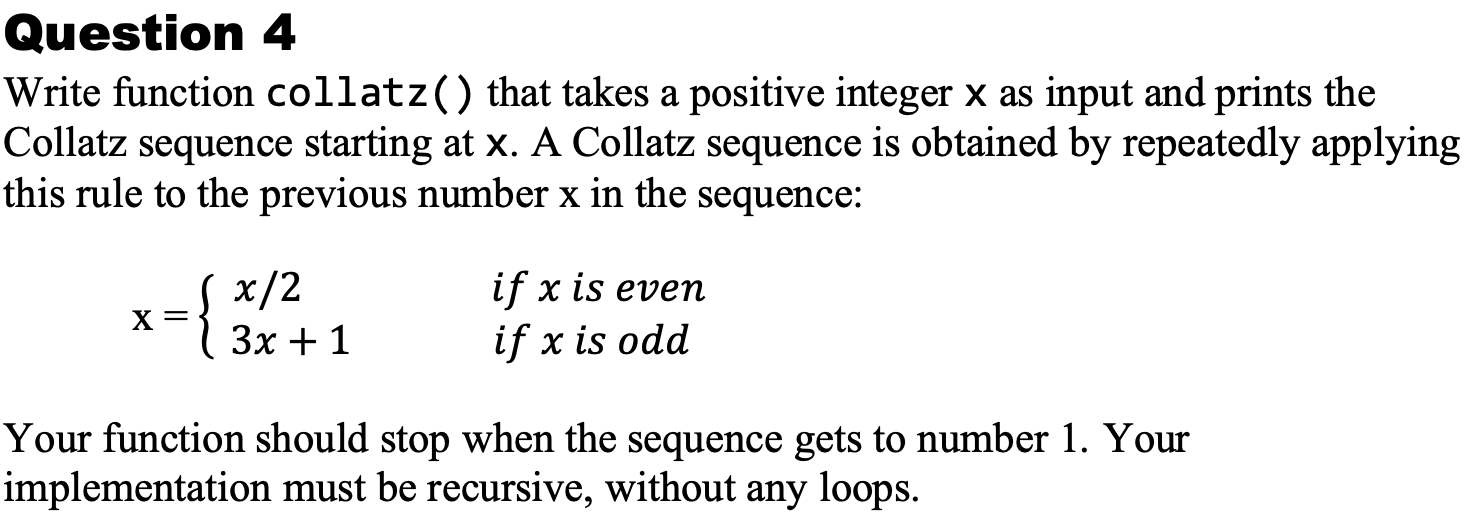

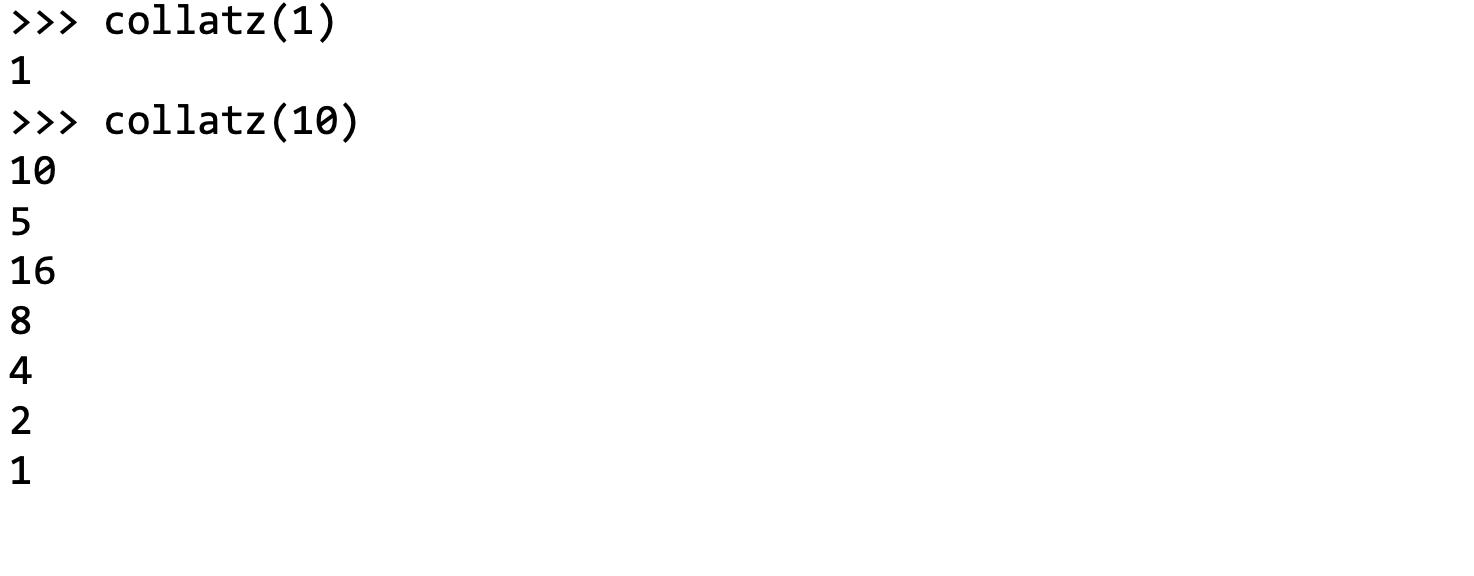

**Answer**

In [3]:
def collatz(x):
    print(x)
    if x == 1:
        return
    elif x % 2 == 0:
        collatz(x // 2)
    else:
        collatz(3 * x + 1)

# Test cases
collatz(1)
collatz(10)


1
10
5
16
8
4
2
1


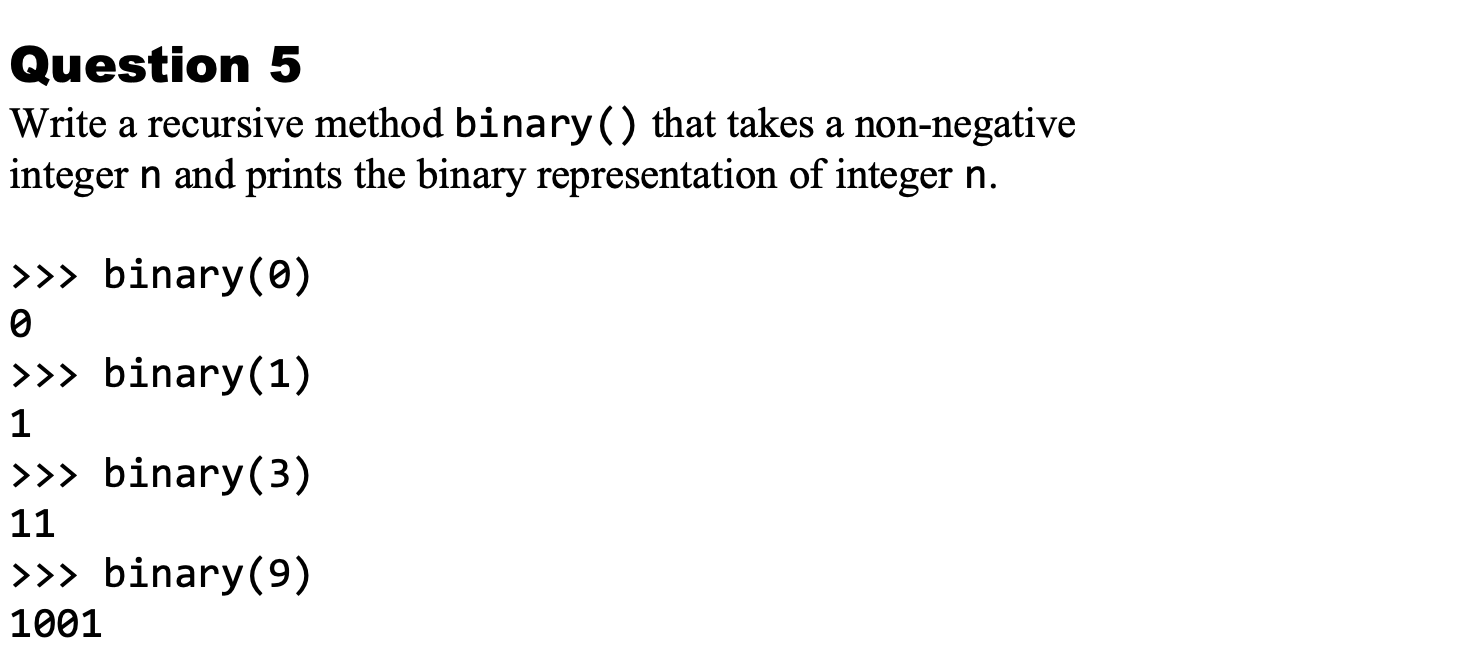

In [5]:
def binary(n):
    if n > 1:
        binary(n // 2)
    print(n % 2, end='')

# Test cases
binary(0)
print()
binary(1)
print()
binary(3)
print()
binary(9)


0
1
11
1001

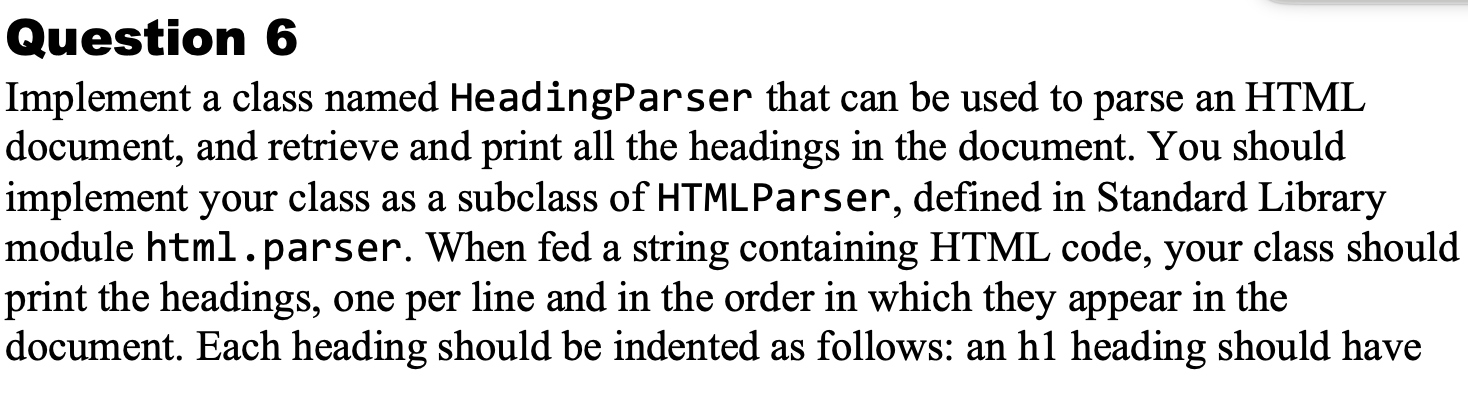

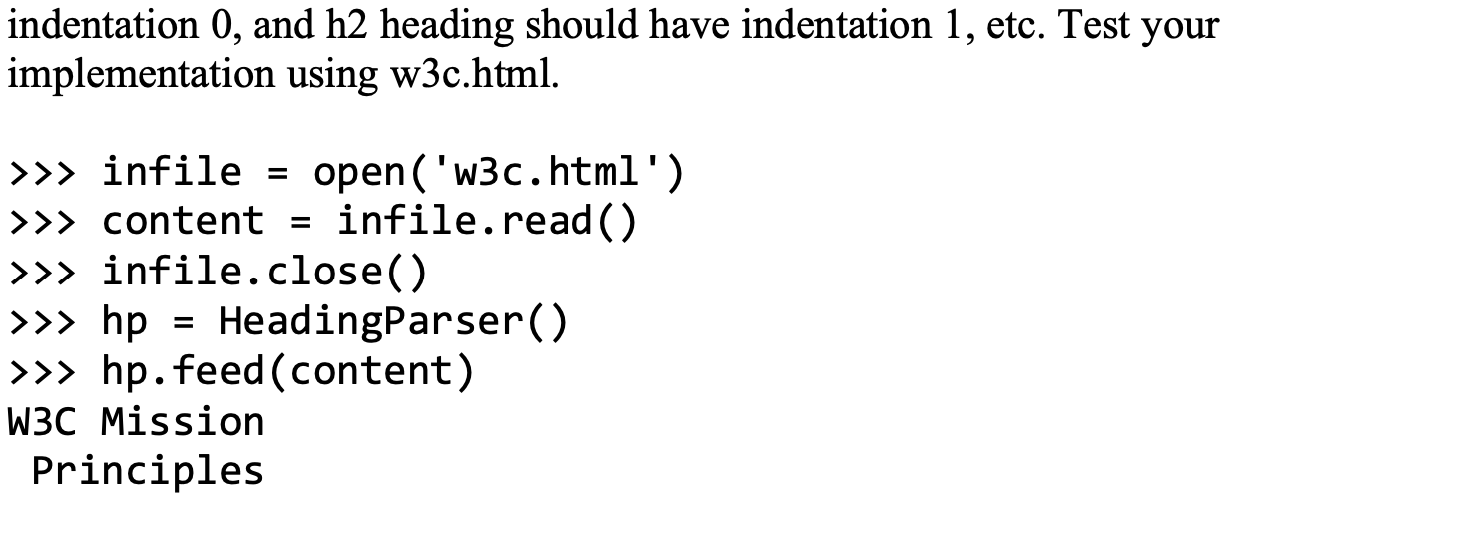

In [16]:
from html.parser import HTMLParser
class HeadingParser(HTMLParser):

    def __init__(self):
        self.flag = False
        HTMLParser.__init__(self)
        self.start_tags=[]
        self.heading_data=[]

    def feed(self,filename):
        infile = open('w3c.html')
        content = infile.read()
        infile.close()
        HTMLParser.feed(self,content)
        self.print_details()

    def handle_starttag(self, tag, attrs):
        if tag == 'h1':
            self.flag=True
            self.start_tags.append(0)
        if tag == 'h2':
            self.flag=True
            self.start_tags.append(1)
        if tag == 'h3':
            self.flag=True
            self.start_tags.append(2)
        if tag == 'h4':
            self.flag=True
            self.start_tags.append(3)
        if tag == 'h5':
            self.flag=True
            self.start_tags.append(4)
        if tag == 'h6':
            self.flag=True
            self.start_tags.append(5)

    def handle_data(self, data):
        global heading_data
        if self.flag == True:
            self.flag=False
            self.heading_data.append(data)

    def print_details(self):
        for i in self.start_tags:
            print('\t'*i + self.heading_data[i])

In [17]:
headingParser = HeadingParser()
headingParser.feed('w3c.html')

W3C Mission
	Principles


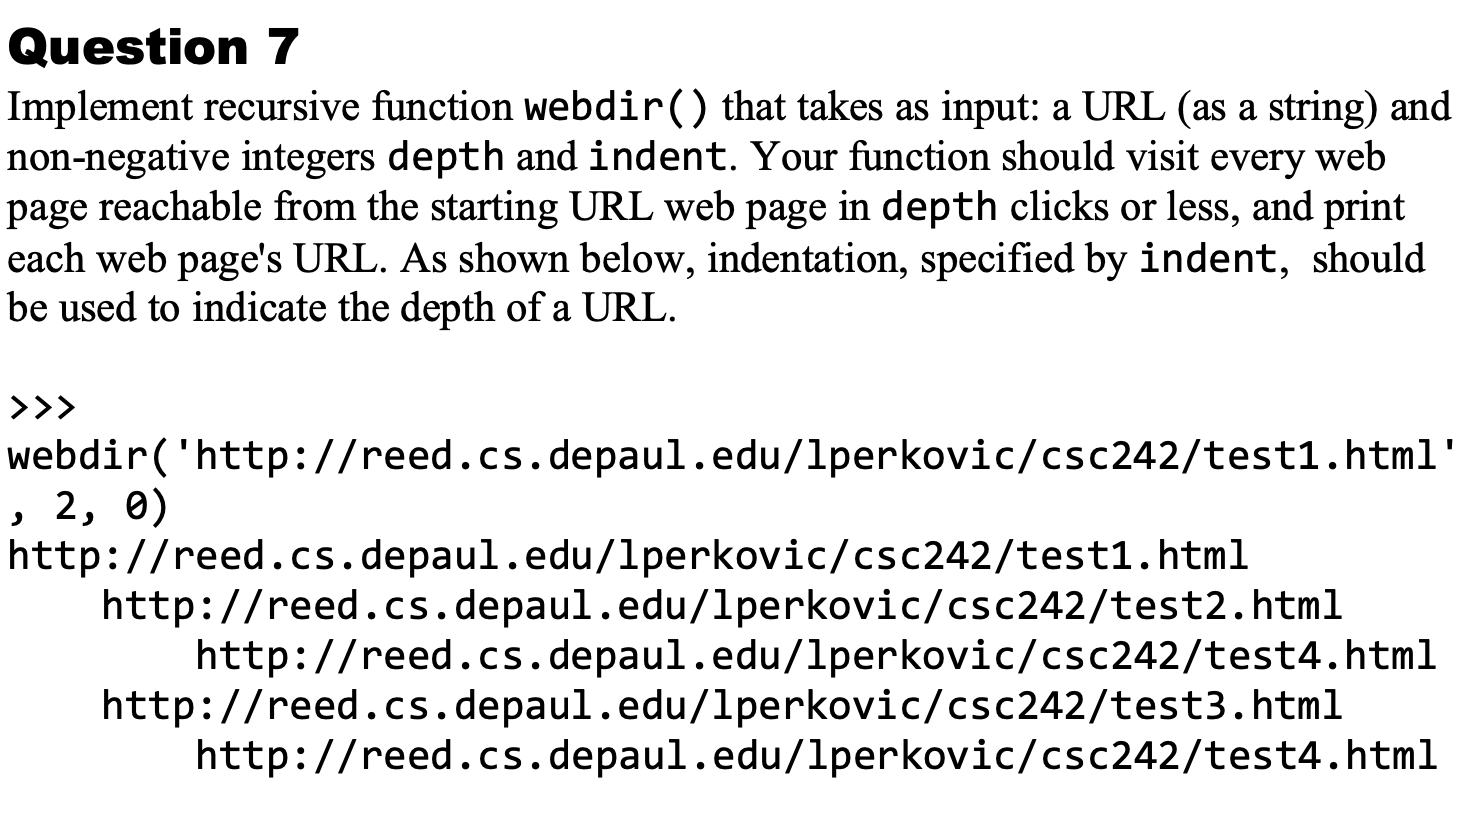

In [25]:
from urllib.parse import urljoin
from html.parser import HTMLParser
from urllib.request import urlopen

class Collector(HTMLParser):
    'collects hyperlink URLs into a list'

    def __init__(self, url):
        'initializes parser, the url, and a list'
        HTMLParser.__init__(self)
        self.url = url
        self.links = []


    def handle_starttag(self, tag, attrs):
        'collects hyperlink URLs in their absolute format'
        if tag == 'a':
            for attr in attrs:
                if attr[0] == 'href':
                    # construct absolute URL
                    absolute = urljoin(self.url, attr[1])
                    if absolute[:4] == 'http': # collect HTTP URLs
                        self.links.append(absolute)

    def getLinks(self):
        'returns hyperlinks URLs in their absolute format'
        return self.links

In [ ]:
visited = set()
urls=[]
def webdir(url,depth,indent):
    global visited
    print(("\t"*indent)+url)
    for deep in range(depth):
        visited.add(url)
        resource = urlopen(url)
        content = resource.read().decode()
        collector = Collector(url)
        collector.feed(content)
        urls=collector.getLinks()
        for nesturl in urls:
            if nesturl not in visited:
                webdir(nesturl,depth-1,indent+1)
webdir('http://reed.cs.depaul.edu/lperkovic/csc242/test1.html',2,0)

# I think there is something wrong with this provided link. Please verify and check the code.


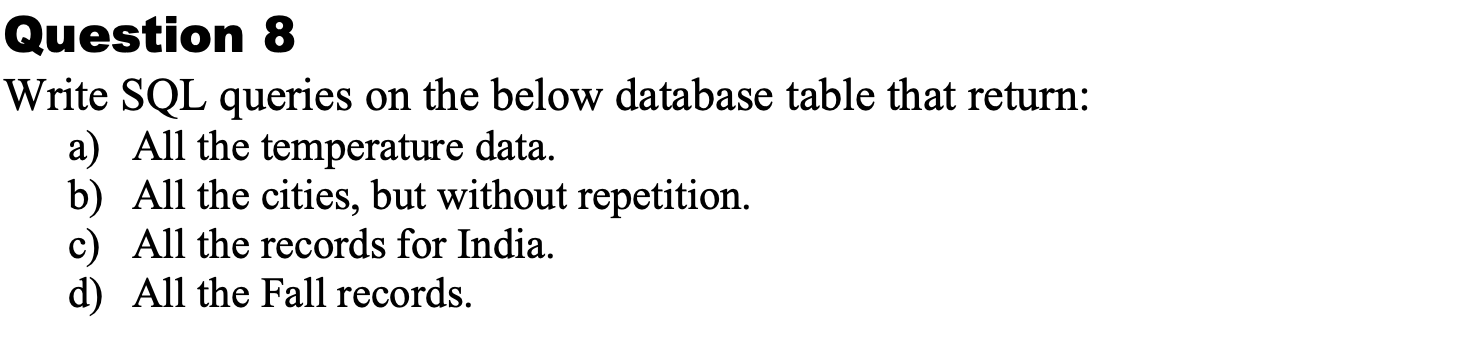

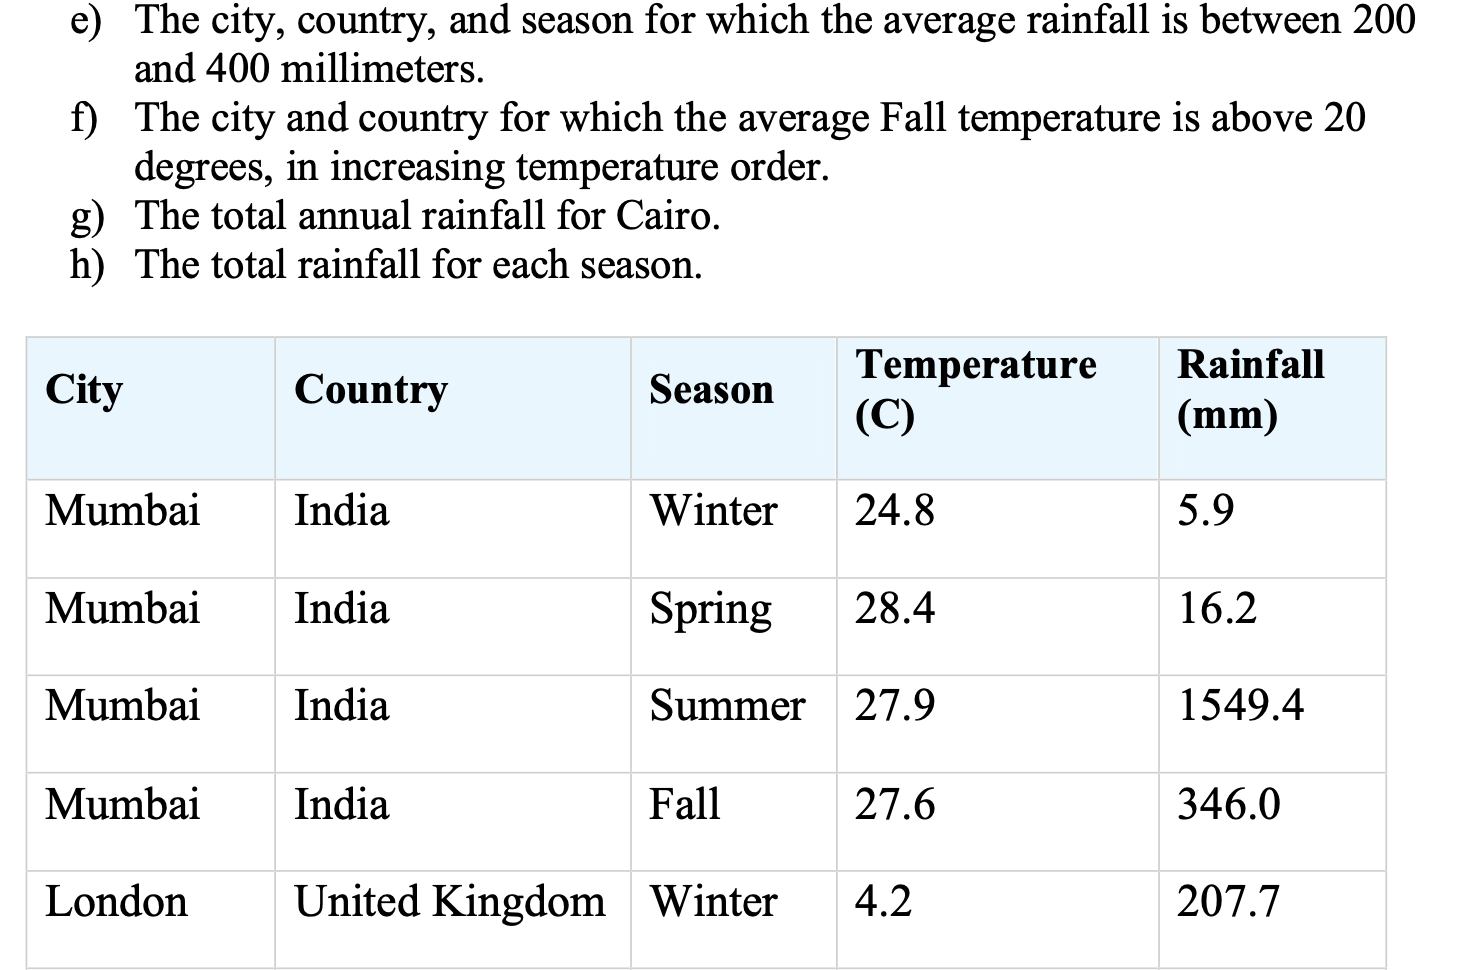

In [30]:
import sqlite3
con=sqlite3.connect('ClimateDb.db')
cur=con.cursor()
cur.execute("CREATE TABLE Climate (City text, Country text, Season text, Temperature float, Rainfall float)")

In [31]:
cur.execute("INSERT INTO Climate VALUES ('Mumbai', 'India', 'Winter', 24.8, 5.9)")
cur.execute("INSERT INTO Climate VALUES ('Mumbai', 'India', 'Spring', 28.4, 16.2)")
cur.execute("INSERT INTO Climate VALUES ('Mumbai', 'India', 'Summer', 27.9, 1549.4)")
cur.execute("INSERT INTO Climate VALUES ('Mumbai', 'India', 'Fall', 27.6, 346.0)")
cur.execute("INSERT INTO Climate VALUES ('London', 'United Kingdom', 'Winter', 4.2, 207.7)")
cur.execute("INSERT INTO Climate VALUES ('London', 'United Kingdom', 'Spring', 8.3, 169.6)")
cur.execute("INSERT INTO Climate VALUES ('London', 'United Kingdom', 'Summer', 15.7, 157.0)")
cur.execute("INSERT INTO Climate VALUES ('London', 'United Kingdom', 'Fall', 10.4, 218.5)")
cur.execute("INSERT INTO Climate VALUES ('Cairo', 'Egypt', 'Winter', 13.6, 16.5)")
cur.execute("INSERT INTO Climate VALUES ('Cairo', 'Egypt', 'Spring', 20.7, 6.5)")
cur.execute("INSERT INTO Climate VALUES ('Cairo', 'Egypt', 'Summer', 27.7, 0.1)")
cur.execute("INSERT INTO Climate VALUES ('Cairo', 'Egypt', 'Fall', 22.2, 4.5)")

In [33]:
cur.execute("SELECT * FROM Climate")
for i in cur:
  print (i)

('Mumbai', 'India', 'Winter', 24.8, 5.9)
('Mumbai', 'India', 'Spring', 28.4, 16.2)
('Mumbai', 'India', 'Summer', 27.9, 1549.4)
('Mumbai', 'India', 'Fall', 27.6, 346.0)
('London', 'United Kingdom', 'Winter', 4.2, 207.7)
('London', 'United Kingdom', 'Spring', 8.3, 169.6)
('London', 'United Kingdom', 'Summer', 15.7, 157.0)
('London', 'United Kingdom', 'Fall', 10.4, 218.5)
('Cairo', 'Egypt', 'Winter', 13.6, 16.5)
('Cairo', 'Egypt', 'Spring', 20.7, 6.5)
('Cairo', 'Egypt', 'Summer', 27.7, 0.1)
('Cairo', 'Egypt', 'Fall', 22.2, 4.5)


In [34]:
cur.execute("SELECT Temperature FROM Climate")
for i in cur:
    print (i[0])

24.8
28.4
27.9
27.6
4.2
8.3
15.7
10.4
13.6
20.7
27.7
22.2


In [35]:
cur.execute("SELECT DISTINCT(City) FROM Climate")
for i in cur:
    print (i[0])

Mumbai
London
Cairo


In [36]:
cur.execute("SELECT * FROM Climate WHERE Season='Fall'")
for i in cur:
    print (i)

('Mumbai', 'India', 'Fall', 27.6, 346.0)
('London', 'United Kingdom', 'Fall', 10.4, 218.5)
('Cairo', 'Egypt', 'Fall', 22.2, 4.5)


In [37]:
cur.execute("SELECT * FROM Climate WHERE Season='Fall'")
for i in cur:
    print (i)

('Mumbai', 'India', 'Fall', 27.6, 346.0)
('London', 'United Kingdom', 'Fall', 10.4, 218.5)
('Cairo', 'Egypt', 'Fall', 22.2, 4.5)


In [38]:
cur.execute("SELECT City,Country,Season FROM Climate WHERE Rainfall>=200 AND Rainfall<=400")
for i in cur:
    print (i)

('Mumbai', 'India', 'Fall')
('London', 'United Kingdom', 'Winter')
('London', 'United Kingdom', 'Fall')


In [39]:
cur.execute("SELECT city, country FROM Climate WHERE Season='Fall' AND temperature>20 ORDER BY Temperature")
for i in cur:
    print (i)

('Cairo', 'Egypt')
('Mumbai', 'India')


In [40]:
cur.execute("SELECT sum(Rainfall) FROM Climate WHERE City = 'Cairo'")
for i in cur:
    print (i[0])

27.6


In [41]:
cur.execute("SELECT season, round(sum(Rainfall),2) FROM Climate GROUP BY Season")
for i in cur:
    print (i)

('Fall', 569.0)
('Spring', 192.3)
('Summer', 1706.5)
('Winter', 230.1)


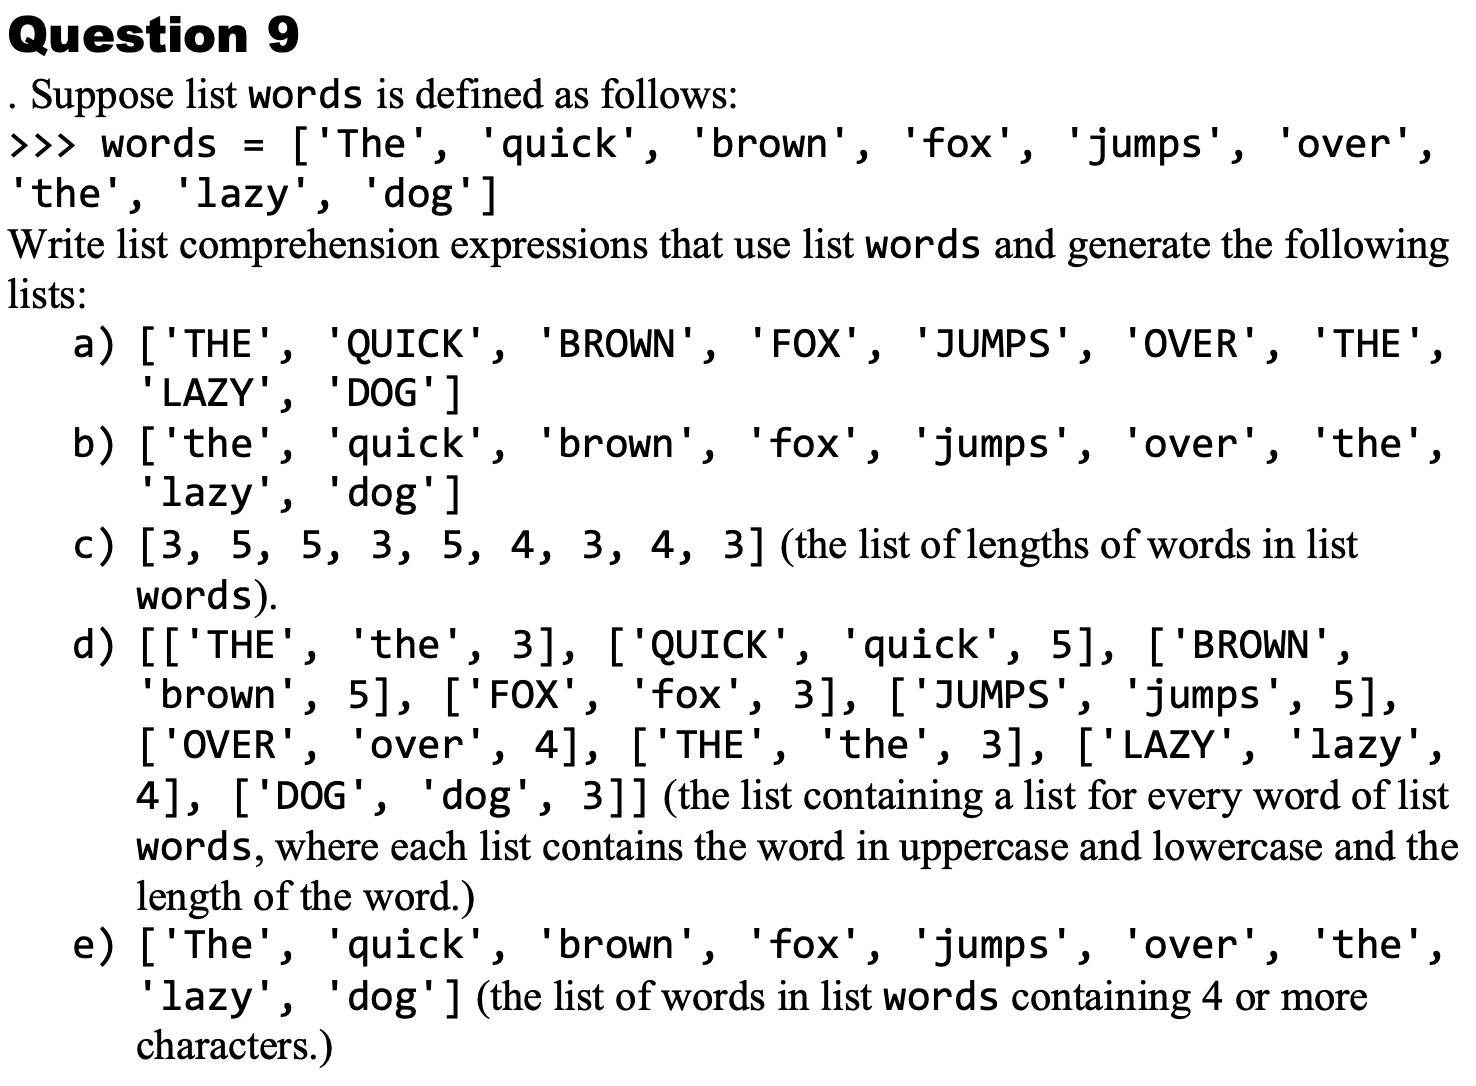

In [24]:
words = ['The', 'quick', 'brown', 'fox', 'jumps', 'over',
'the', 'lazy', 'dog']
newlist = [x.upper() for x in words]
print(newlist)

newlist = [x.lower() for x in words]
print(newlist)

newlist = [len(x) for x in words]
print(newlist)

newlist = [[x.upper(),x.lower(),len(x)] for x in words]
print(newlist)

newlist = [x for x in words if len(x)>=4]
print(newlist)

['THE', 'QUICK', 'BROWN', 'FOX', 'JUMPS', 'OVER', 'THE', 'LAZY', 'DOG']
['the', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']
[3, 5, 5, 3, 5, 4, 3, 4, 3]
[['THE', 'the', 3], ['QUICK', 'quick', 5], ['BROWN', 'brown', 5], ['FOX', 'fox', 3], ['JUMPS', 'jumps', 5], ['OVER', 'over', 4], ['THE', 'the', 3], ['LAZY', 'lazy', 4], ['DOG', 'dog', 3]]
['quick', 'brown', 'jumps', 'over', 'lazy']
